In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

In [22]:
# Baca dataset
df = pd.read_csv("heart.csv")
print(df.head())
print(df.info())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age    

In [23]:
# Cek nilai yang hilang
print("Jumlah missing values tiap kolom:\n", df.isnull().sum())

# Ubah fitur kategorikal menjadi numerik
df_encoded = pd.get_dummies(df, drop_first=True)

# Pisahkan fitur dan target
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

# Split data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Jumlah missing values tiap kolom:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [24]:
model_overfit = DecisionTreeClassifier(random_state=42)
model_overfit.fit(X_train, y_train)
y_pred_overfit = model_overfit.predict(X_test)


In [25]:
model_pruned = DecisionTreeClassifier(max_depth=4, random_state=42)
model_pruned.fit(X_train, y_train)
y_pred_pruned = model_pruned.predict(X_test)

In [26]:
print("=== Model Overfit ===")
print(classification_report(y_test, y_pred_overfit))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_overfit))

print("\n=== Model Pruned (max_depth=4) ===")
print(classification_report(y_test, y_pred_pruned))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_pruned))

=== Model Overfit ===
              precision    recall  f1-score   support

           0       0.68      0.84      0.75       112
           1       0.87      0.73      0.79       164

    accuracy                           0.78       276
   macro avg       0.78      0.79      0.77       276
weighted avg       0.79      0.78      0.78       276

Confusion Matrix:
 [[ 94  18]
 [ 44 120]]

=== Model Pruned (max_depth=4) ===
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       112
           1       0.89      0.80      0.85       164

    accuracy                           0.83       276
   macro avg       0.82      0.83      0.82       276
weighted avg       0.83      0.83      0.83       276

Confusion Matrix:
 [[ 96  16]
 [ 32 132]]


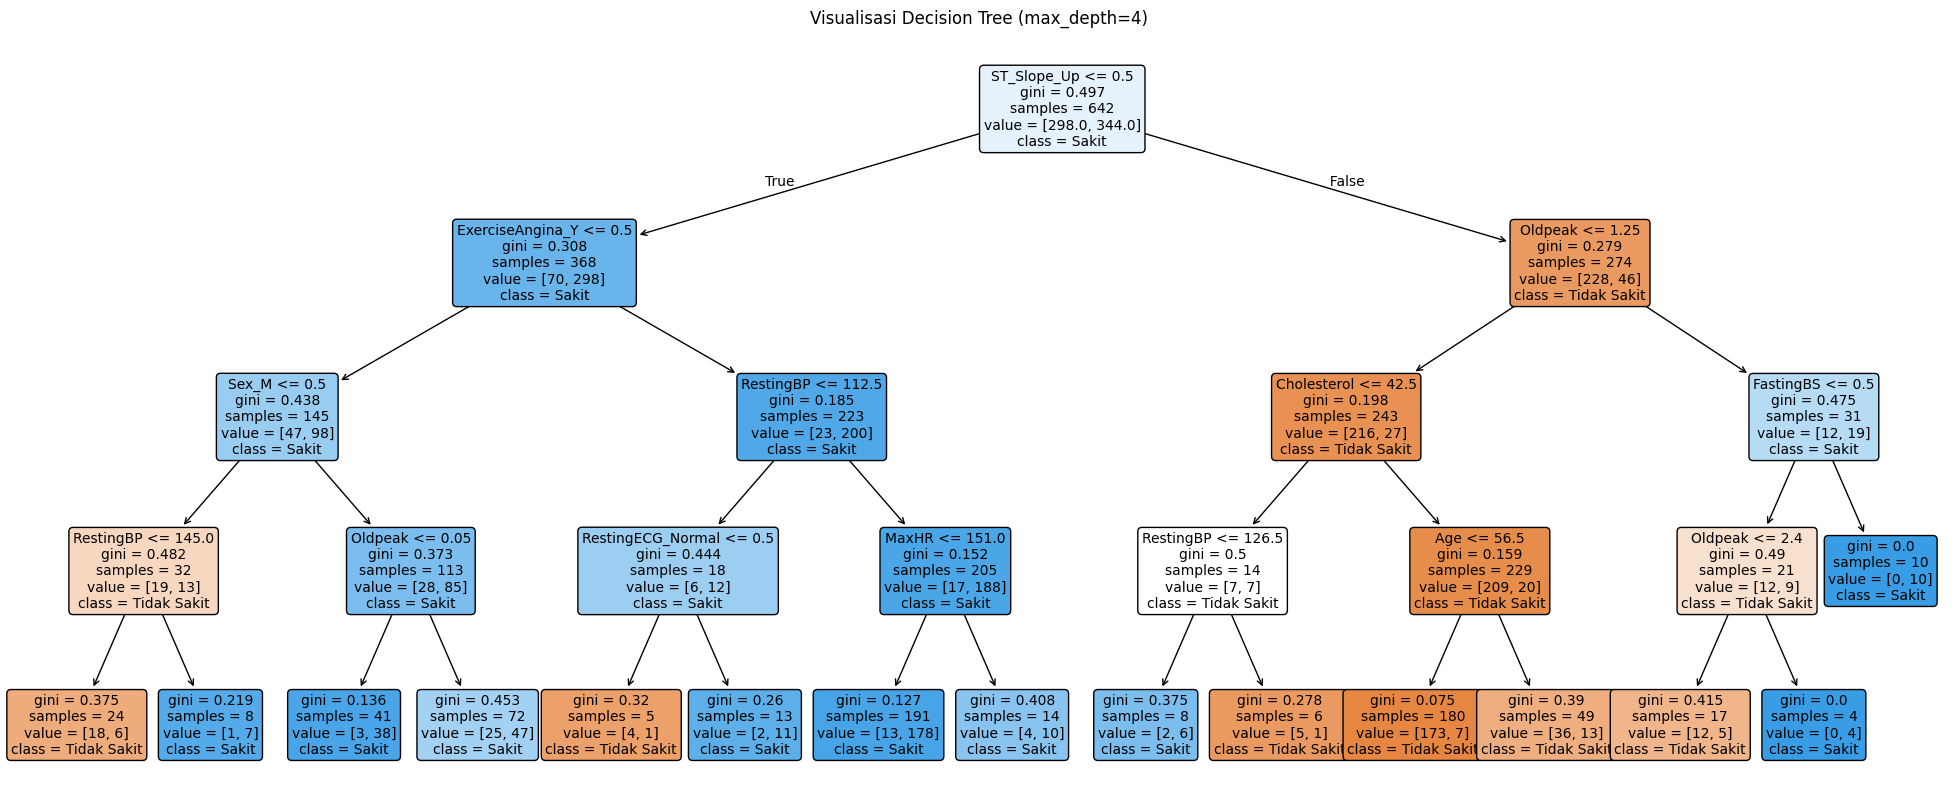

In [28]:
plt.figure(figsize=(25,10))
plot_tree(
    model_pruned,
    feature_names=X.columns,
    class_names=['Tidak Sakit', 'Sakit'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Visualisasi Decision Tree (max_depth=4)")
plt.show()

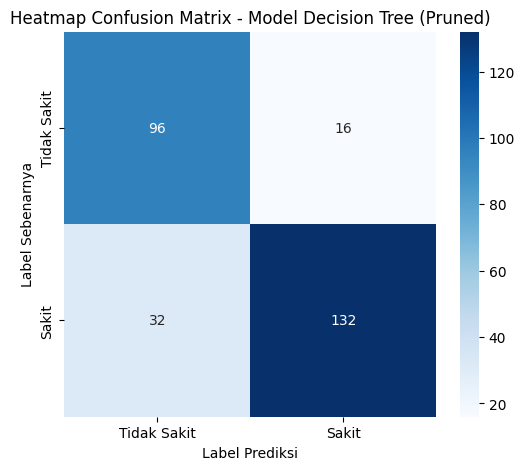

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_pruned)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Sakit', 'Sakit'],
            yticklabels=['Tidak Sakit', 'Sakit'])
plt.xlabel('Label Prediksi')
plt.ylabel('Label Sebenarnya')
plt.title('Heatmap Confusion Matrix - Model Decision Tree (Pruned)')
plt.show()


C:\Users\ZENBOOK\AppData\Local\Temp\ipykernel_20864\2437263682.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pentingnya', y='Fitur', data=feature_importance_df, palette='viridis')


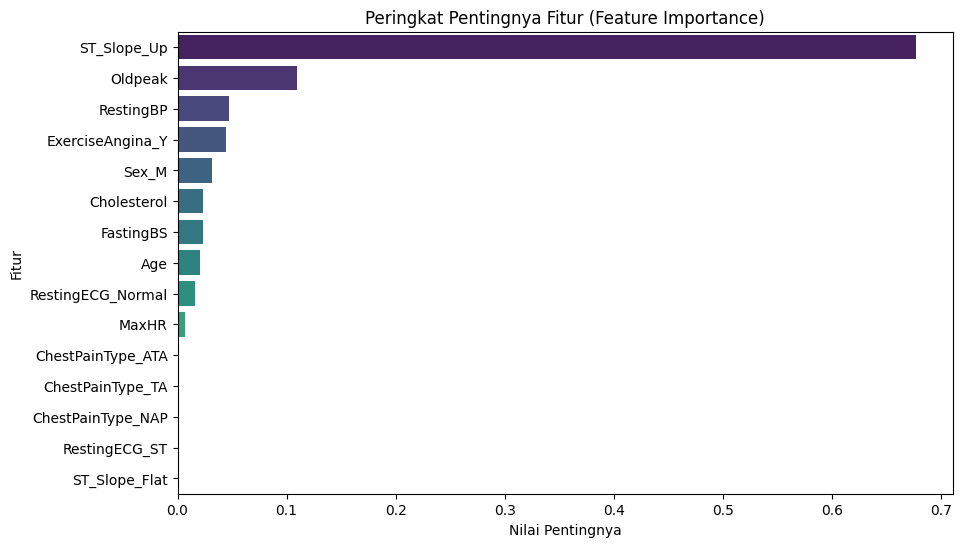

In [30]:
importances = model_pruned.feature_importances_
feature_importance_df = pd.DataFrame({
    'Fitur': X.columns,
    'Pentingnya': importances
}).sort_values(by='Pentingnya', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Pentingnya', y='Fitur', data=feature_importance_df, palette='viridis')
plt.title('Peringkat Pentingnya Fitur (Feature Importance)')
plt.xlabel('Nilai Pentingnya')
plt.ylabel('Fitur')
plt.show()


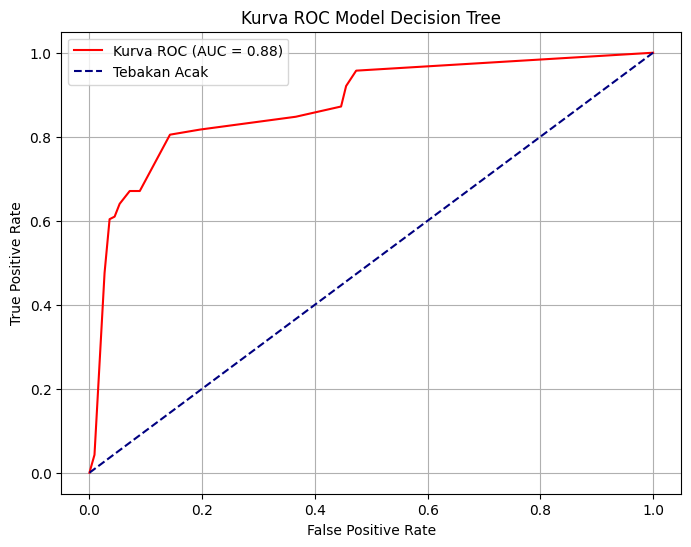

In [31]:
y_pred_proba = model_pruned.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='red', label=f'Kurva ROC (AUC = {auc:.2f})')
plt.plot([0,1],[0,1], color='navy', linestyle='--', label='Tebakan Acak')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC Model Decision Tree')
plt.legend()
plt.grid(True)
plt.show()


In [32]:
import joblib
joblib.dump(model_pruned, "model_decision_tree_heart.joblib")


['model_decision_tree_heart.joblib']